In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM, Activation, SimpleRNN 

# TIME step 마늠 시퀀스 데이터 분석
def split_sequence(sequence, step):
    # split sequence
    x, y = list(), list()
    
    # put end_idx to the end of the sequence, if end_idx is bigger than the length of the sequence, break
    for i in range(len(sequence)):
        end_idx = i + step
        if end_idx > len(sequence) - 1:
            break
            
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        # append to the list
        x.append(seq_x)
        y.append(seq_y)
        
    return np.array(x), np.array(y)
   
   
# Sin function train data
x = [i for i in np.arange(start=-10, stop=10, step=0.1)]
train_y = [np.sin(i) for i in x]

# hyperparameter
n_timesteps = 15
n_features = 1

# split sequence
# 15개의 데이터를 보고 다음 데이터를 예측
# train_x.shape => (samples, timesteps)
# train_y.shape => (samples)
train_x, train_y = split_sequence(train_y, n_timesteps)
print("shape x:{} / y:{}".format(train_x.shape, train_y.shape))

# Change the dimension of the vector to adjust the rnn input shape
# reshape from [samples, timesteps] into [samples, timesteps, features]
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)
print("train_x.shape:{}".format(train_x.shape))
print("train_y.shape:{}".format(train_y.shape))




shape x:(185, 15) / y:(185,)
train_x.shape:(185, 15, 1)
train_y.shape:(185,)


In [3]:
# RNN 모델 정의 
model = Sequential()
model.add(SimpleRNN(units=10,
                    return_sequences=False,
                    input_shape=(n_timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 모델 학습
np.random.seed(0)
# seed(0) => 항상 같은 결과를 얻기 위해 사용
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='loss', 
    patience=5,  # stop training when loss is not improving after 5 epochs
    mode='auto')# mode "auto" means that it automatically determines the direction of the improvement
history = model.fit(train_x, train_y, epochs=1000, callbacks=[early_stopping])

Epoch 1/1000


2024-04-22 10:06:00.306391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 1s 76ms/step - loss: 0.9926
Epoch 2/1000
6/6 [==============================] - 0s 64ms/step - loss: 0.8163
Epoch 3/1000
6/6 [==============================] - 0s 62ms/step - loss: 0.6465
Epoch 4/1000
6/6 [==============================] - 0s 67ms/step - loss: 0.5023
Epoch 5/1000
6/6 [==============================] - 0s 66ms/step - loss: 0.3778
Epoch 6/1000
6/6 [==============================] - 0s 64ms/step - loss: 0.2807
Epoch 7/1000
6/6 [==============================] - 0s 63ms/step - loss: 0.2105
Epoch 8/1000
6/6 [==============================] - 0s 63ms/step - loss: 0.1576
Epoch 9/1000
6/6 [==============================] - 0s 68ms/step - loss: 0.1253
Epoch 10/1000
6/6 [==============================] - 0s 63ms/step - loss: 0.1017
Epoch 11/1000
6/6 [==============================] - 0s 63ms/step - loss: 0.0859
Epoch 12/1000
6/6 [==============================] - 0s 63ms/step - loss: 0.0748
Epoch 13/1000
6/6 [==============================]

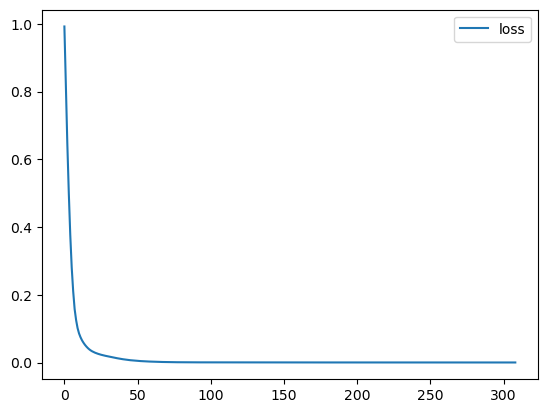

In [4]:
plt.plot(history.history['loss'], label='loss')
plt.legend(loc='upper right')
plt.show()

In [5]:
# test 
test_x = np.arange(10, 20, 0.1)
calc_y = np.cos(test_x) # test data



In [6]:
# to predict the future value, we need to predict step by step
test_y = calc_y[:n_timesteps]
for i in range(len(test_x) - n_timesteps):
    net_input = test_y[i: i+n_timesteps]
    net_input = net_input.reshape((1, n_timesteps, n_features))
    predict_y = model.predict(net_input)
    test_y = np.append(test_y, predict_y)
    

2024-04-22 10:09:07.208171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 23ms/step


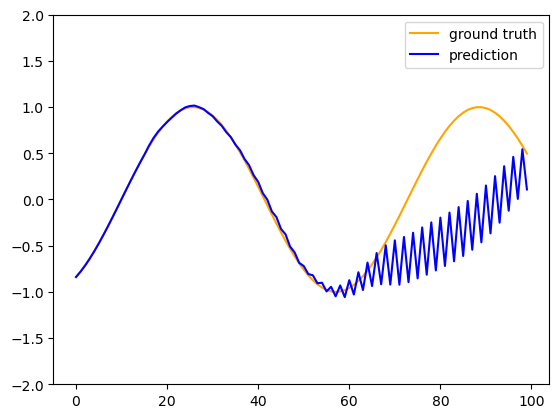

In [7]:
plt.plot(calc_y, label='ground truth', color='orange')
plt.plot(test_y, label='prediction', color='blue')
plt.legend(loc='upper right')
plt.ylim(-2, 2)
plt.show()